In [ ]:
!pip install yfinance
!pip install neptune
!pip install transformers
!pip install datasets
!pip install accelerate
!pip install scikit-learn

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = '545 Group/orgi'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['re-realize.ipynb', 'dataset', 'requirements.txt', 'README.md', '.gitignore', 'pyproject.toml', 'poetry.lock', 'src', 'raw', 'notebook', '__init__.py', '__pycache__', 'Original_FinBert_test.ipynb', 'labeled_stock.csv', 'transformer.ipynb']


In [ ]:
os.chdir(GOOGLE_DRIVE_PATH)

In [ ]:
import yfinance as yf

# "GSPC" for S&P500
sp500 = yf.Ticker("^NDX")

# Get data for a specific date range
price_data = sp500.history(start="2010-01-01", end="2024-01-03")
price_data.columns = [col.lower() for col in price_data.columns]

In [ ]:
price_data.head()

,open,high,low,close,volume,dividends,stock splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,1882.689941,1890.020020,1881.630005,1886.699951,1931380000,0.0,0.0
2010-01-05 00:00:00-05:00,1887.280029,1891.329956,1877.520020,1888.430054,2367860000,0.0,0.0
2010-01-06 00:00:00-05:00,1887.910034,1893.209961,1873.900024,1878.420044,2253340000,0.0,0.0
2010-01-07 00:00:00-05:00,1878.160034,1881.329956,1867.619995,1876.719971,2270050000,0.0,0.0
2010-01-08 00:00:00-05:00,1870.900024,1893.250000,1868.550049,1892.589966,2145390000,0.0,0.0


In [ ]:
from src.labeler import TripleBarrierLabeler

labeler = TripleBarrierLabeler()
labeler.fit(price_data)
labeled_price_data = labeler.transform()

In [ ]:
labeled_price_data.head(20)

,open,high,low,close,volume,dividends,stock splits,daily_returns,volatility,label,window_start,upper_barrier,lower_barrier
Date,,,,,,,,,,,,,
2010-01-04,1882.689941,1890.020020,1881.630005,1886.699951,1931380000,0.0,0.0,NaN,NaN,1,True,NaN,NaN
2010-01-05,1887.280029,1891.329956,1877.520020,1888.430054,2367860000,0.0,0.0,0.000917,NaN,1,False,NaN,NaN
2010-01-06,1887.910034,1893.209961,1873.900024,1878.420044,2253340000,0.0,0.0,-0.005315,0.004406,1,False,NaN,NaN
2010-01-07,1878.160034,1881.329956,1867.619995,1876.719971,2270050000,0.0,0.0,-0.000905,0.003076,1,False,NaN,NaN
2010-01-08,1870.900024,1893.250000,1868.550049,1892.589966,2145390000,0.0,0.0,0.008421,0.006277,1,False,NaN,NaN
2010-01-11,1896.050049,1897.489990,1876.250000,1886.239990,2077890000,0.0,0.0,-0.003361,0.005733,1,False,NaN,NaN
2010-01-12,1874.750000,1876.369995,1852.310059,1861.790039,2368320000,0.0,0.0,-0.013047,0.008278,1,False,NaN,NaN
2010-01-13,1868.199951,1890.810059,1855.270020,1886.130005,2318350000,0.0,0.0,0.012989,0.010923,1,False,NaN,NaN
2010-01-14,1880.459961,1891.729980,1880.349976,1886.520020,2254170000,0.0,0.0,0.000207,0.009222,0,True,1903.917213,1869.122826


In [ ]:
labeled_price_data.tail(20)

,open,high,low,close,volume,dividends,stock splits,daily_returns,volatility,label,window_start,upper_barrier,lower_barrier
Date,,,,,,,,,,,,,
2023-12-04,15837.120117,15852.450195,15695.580078,15839.669922,6270020000,0.0,0.0,-0.009920,0.006333,0,False,16025.179823,15870.560411
2023-12-05,15763.650391,15931.839844,15760.589844,15877.709961,6179120000,0.0,0.0,0.002399,0.005831,0,False,16025.179823,15870.560411
2023-12-06,15990.200195,15990.940430,15776.950195,15788.049805,5167030000,0.0,0.0,-0.005663,0.005543,2,True,15875.557692,15700.541917
2023-12-07,15888.230469,16042.509766,15875.480469,16022.490234,5694310000,0.0,0.0,0.014740,0.009184,2,False,15875.557692,15700.541917
2023-12-08,15952.849609,16100.860352,15937.580078,16084.690430,5430840000,0.0,0.0,0.003875,0.007993,2,False,15875.557692,15700.541917
2023-12-11,16069.620117,16232.259766,16061.870117,16221.730469,5607820000,0.0,0.0,0.008484,0.007447,2,False,15875.557692,15700.541917
2023-12-12,16209.610352,16354.250000,16175.459961,16354.250000,4950100000,0.0,0.0,0.008136,0.006723,2,True,16464.204852,16244.295148
2023-12-13,16392.179688,16581.039062,16357.209961,16562.369141,6732040000,0.0,0.0,0.012645,0.006811,2,False,16464.204852,16244.295148
2023-12-14,16603.539062,16660.710938,16419.259766,16537.830078,8033170000,0.0,0.0,-0.001483,0.007103,2,False,16464.204852,16244.295148


In [ ]:
labeled_price_data_only = labeled_price_data["label"].reset_index()

In [ ]:
labeled_price_data_only.head(10)

,Date,label
0,2010-01-04,1
1,2010-01-05,1
2,2010-01-06,1
3,2010-01-07,1
4,2010-01-08,1
5,2010-01-11,1
6,2010-01-12,1
7,2010-01-13,1
8,2010-01-14,0
9,2010-01-15,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 1. 取前10行并重置索引（让 Date 成为列）
df_head = labeled_price_data_only

# 2. 指定要保存到 Drive 的路径（比如我的“我的云端硬盘/数据”里）
output_path = '/content/drive/My Drive/545 Group/orgi/labeled_stock.csv'

# 3. 保存
df_head.to_csv(output_path, index=False)

print(f'Already stored in Google Drive: {output_path}')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Already stored in Google Drive: /content/drive/My Drive/545 Group/orgi/labeled_stock.csv


In [ ]:
labeled_price_data.dtypes

,0
open,float64
high,float64
low,float64
close,float64
volume,int64
dividends,float64
stock splits,float64
daily_returns,float64
volatility,float64
label,int64


In [ ]:
labeled_price_data['label'].value_counts()

,count
label,
2,2015
0,1416
1,92


In [1]:
# import matplotlib.pyplot as plt

# # --- 折线图：label 随时间变化 ---
# plt.figure(figsize=(12, 5))
# plt.plot(labeled_price_data.index, labeled_price_data['label'])
# plt.title('Label')
# plt.xlabel('Date')
# plt.ylabel('Label')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # --- 直方图：label 的分布 ---
# plt.figure(figsize=(8, 5))
# # 根据你的 label 值域调整 bins 参数
# min_label = int(labeled_price_data['label'].min())
# max_label = int(labeled_price_data['label'].max())
# bins = range(min_label, max_label + 2)  # +2 保证最后一个类别能被包含
# plt.hist(labeled_price_data['label'], bins=bins, align='left')
# plt.title('Label')
# plt.xlabel('Label')
# plt.ylabel('频率')
# plt.xticks(bins)   # 显示每个整数标签
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [ ]:
label_series = labeled_price_data['label']
new_index = pd.date_range(start=label_series.index[0], end=label_series.index[-1], freq='D').strftime('%Y-%m-%d')
new_index


Index(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
       '2010-01-09', '2010-01-10', '2010-01-11', '2010-01-12', '2010-01-13',
       ...
       '2023-12-24', '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
       '2023-12-29', '2023-12-30', '2023-12-31', '2024-01-01', '2024-01-02'],
      dtype='object', length=5112)

In [ ]:
label_series = label_series.reindex(new_index).ffill().astype(int)
label_series.tail(20)

,label
2023-12-14,2
2023-12-15,2
2023-12-16,2
2023-12-17,2
2023-12-18,0
2023-12-19,0
2023-12-20,0
2023-12-21,0
2023-12-22,2
2023-12-23,2


In [ ]:
def plot_triple_barrier(df,loc=1,sample_point_index=10, start_index = 0, n_days = 100 ,time_out = 20 ):
  """
    parameters :
      loc = 1 => position of smaller plot up
      loc = 2 => position of smaller plot down
      sample_point_index : the point which is going to show the labelling details
      time_out : how many next day's data are used for labeling of each point
  """
  price = df.close.to_numpy()[start_index:start_index+n_days]
  # Set initial barriers
  profit_taking = 1.0  # Multiplier for the volatility adjustment
  stop_loss = 1.0  # Multiplier for the volatility adjustment

  # Calculate rolling volatility (standard deviation)
  window = 10  # Window size for rolling calculation
  rolling_volatility = pd.Series(price).rolling(window=window).std().fillna(0)

  # Initialize arrays to hold the barrier values
  upper_barrier = np.zeros(n_days)
  lower_barrier = np.zeros(n_days)

  # Initialize arrays to hold labels
  high_points = np.zeros(n_days, dtype=bool)
  low_points = np.zeros(n_days, dtype=bool)
  neutral_points = np.zeros(n_days, dtype=bool)

  # Iterate over each day to calculate barriers and labels
  for i in range(n_days):
      if i + time_out < n_days:
          future_prices = price[i:i + time_out]
          upper_barrier[i] = price[i] + (profit_taking * rolling_volatility[i])
          lower_barrier[i] = price[i] - (stop_loss * rolling_volatility[i])

          # Check if any future price crosses the barriers
          if np.any(future_prices >= upper_barrier[i]):
              high_points[i] = True
          elif np.any(future_prices <= lower_barrier[i]):
              low_points[i] = True
          else:
              neutral_points[i] = True
      else:
          upper_barrier[i] = np.nan
          lower_barrier[i] = np.nan
          neutral_points[i] = True

  # Plot the stock prices and barriers
  fig, ax = plt.subplots(figsize=(14, 7))
  ax.plot(price, label='Stock Price', color='blue')
  ax.plot(upper_barrier, color='green', linestyle='--', label='Profit Taking Barrier (Volatility Adjusted)')
  ax.plot(lower_barrier, color='red', linestyle='--', label='Stop Loss Barrier (Volatility Adjusted)')
  ax.axvline(time_out, color='purple', linestyle='--', label='Time Out Barrier')

  # Highlight high, low, and neutral points
  ax.scatter(np.where(high_points)[0], price[high_points], color='green', marker='^', label='High Points')
  ax.scatter(np.where(low_points)[0], price[low_points], color='red', marker='v', label='Low Points')
  ax.scatter(np.where(neutral_points)[0], price[neutral_points], color='orange', marker='o', label='Neutral Points')

  # Adding labels and title
  ax.set_xlabel('Days')
  ax.set_ylabel('Price')
  ax.set_title('Stock Prices with Volatility-Adjusted Triple Barrier and Points Classification')
  ax.legend()
  ax.grid(True)



  if sample_point_index is not np.nan:
      if loc == 1:
        inset_ax = inset_axes(ax, width="25%", height="25%", loc=9)
      else:
        inset_ax = inset_axes(ax, width="25%", height="25%", loc=8)

      inset_ax.plot(range(sample_point_index, sample_point_index + time_out), price[sample_point_index:sample_point_index + time_out], label='Stock Price', color='blue')
      inset_ax.plot(range(sample_point_index, sample_point_index + time_out), np.full(time_out, upper_barrier[sample_point_index]), color='green', linestyle='--', label='Upper Barrier')
      inset_ax.plot(range(sample_point_index, sample_point_index + time_out), np.full(time_out, lower_barrier[sample_point_index]), color='red', linestyle='--', label='Lower Barrier')
      inset_ax.grid(True)

      if loc == 1 :
        pos = (0.5, 0.9)
      else :
        pos = (0.3, 0.3)

      ax.annotate('',
                  xy=(sample_point_index, price[sample_point_index]),
                  xycoords='data',
                  xytext=pos,
                  textcoords='axes fraction',
                  arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=5),
                  horizontalalignment='right', verticalalignment='bottom')

  plt.show()

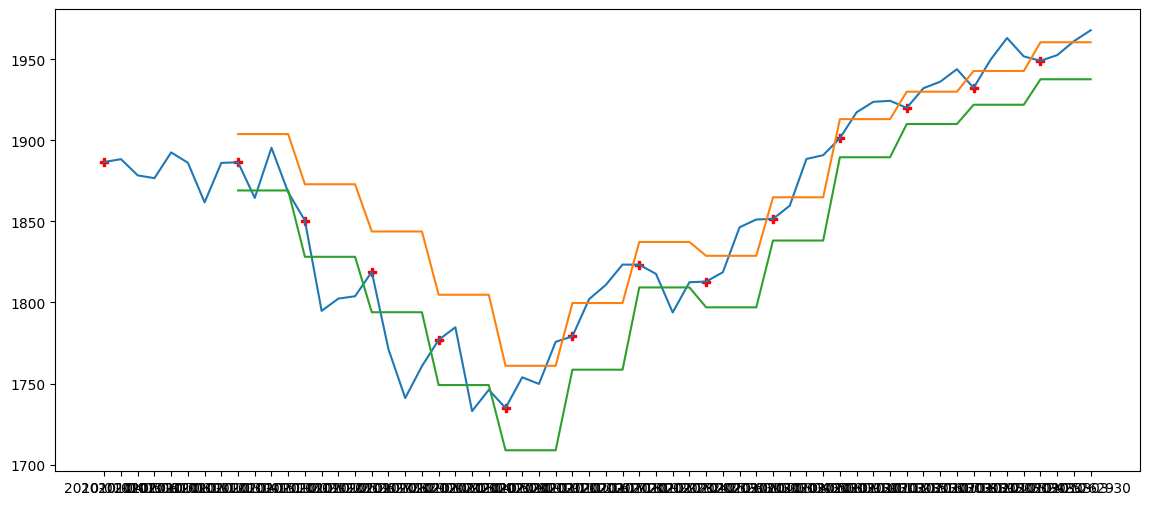

In [ ]:
plot_df = labeled_price_data[0:60]
# Create a new DataFrame where 'window_start' is True
window_starts = plot_df[plot_df['window_start']]

plt.subplots(figsize=(14, 6))

# Plot the 'close', 'upper_barrier', and 'lower_barrier' columns
plt.plot(plot_df.index, plot_df[['close', 'upper_barrier', 'lower_barrier']], ms=1)

# Add markers at the start of each window
plt.scatter(window_starts.index, window_starts['close'], color='red', marker="P")

plt.show()

In [ ]:
def band_generator(labels):
    bands = [{'label': labels.iloc[0], 'from': labels.index[0]}]
    for l, i in enumerate(labels):
        if i == bands[-1]["label"]:
            pass
        else:
            bands[-1]["to"] = labels.index[l]
            # Check if l + 1 is within the range of the labels' indices
            if l + 1 < len(labels):
                bands.append({'label': i, 'from': labels.index[l + 1]})

    # Check if the last band has a 'to' field
    if 'to' not in bands[-1]:
        bands[-1]['to'] = labels.index[-1]

    return bands

In [ ]:
def plot_labels(price_series, labels):
    """
    Plot price series with bullish and bearish areas.

    Parameters:
    - price_series: A pandas Series of prices.
    - labels: A pandas Series of labels (-1, 0, 1).
    """
    # Create a new figure
    fig, ax1 = plt.subplots(figsize=(14, 6))
    ax2 = ax1.twinx()

    # Plot the price series
    ax1.plot(price_series.index, price_series.values, label='Price', color='blue')

    # Draw a box for each window
    for label in labels:
        # Shift "from" and "to" by half a day
        from_timestamp = label["from"]
        to_timestamp = label["to"]

        # Ensure the timestamps are within the price series index
        from_timestamp = max(from_timestamp, price_series.index[0])
        to_timestamp = min(to_timestamp, price_series.index[-1])

        # Add the band
        ax2.fill_betweenx(ax1.get_ylim(), from_timestamp, to_timestamp, color='green' if label["label"] == 1 else "red" if label["label"] == -1 else 'white' , alpha=0.3)

    # Add a legend
    ax1.legend()

    # Show the plot
    plt.show()

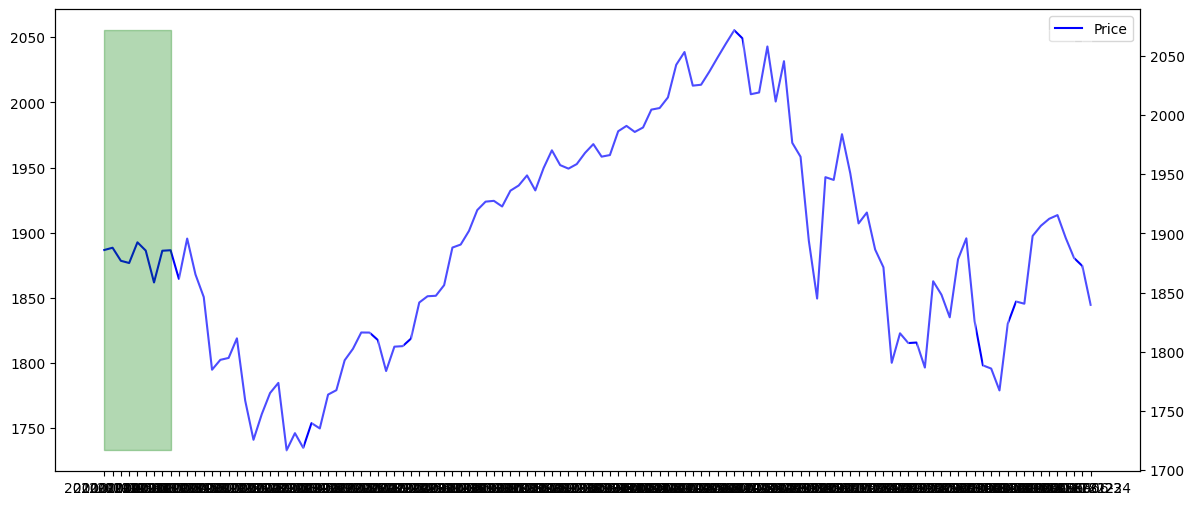

In [ ]:
prices = labeled_price_data[:120]
bands = band_generator(prices.label)
plot_labels(prices.close, bands)

In [ ]:
# load news data
from datasets import load_dataset, DatasetDict

dataset_name = "sabareesh88/FNSPID_nasdaq"

finnews_dataset = load_dataset(dataset_name,
                              #  split="train", on_bad_lines="skip", keep_default_na=False
                               )

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/965 [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

train-00000-of-00048.parquet:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

train-00001-of-00048.parquet:   0%|          | 0.00/1.05G [00:00<?, ?B/s]

train-00002-of-00048.parquet:   0%|          | 0.00/1.03G [00:00<?, ?B/s]

train-00003-of-00048.parquet:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

train-00004-of-00048.parquet:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

train-00005-of-00048.parquet:   0%|          | 0.00/1.01G [00:00<?, ?B/s]

train-00006-of-00048.parquet:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

train-00007-of-00048.parquet:   0%|          | 0.00/695M [00:00<?, ?B/s]

train-00008-of-00048.parquet:   0%|          | 0.00/29.9M [00:00<?, ?B/s]

train-00009-of-00048.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

train-00010-of-00048.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

train-00011-of-00048.parquet:   0%|          | 0.00/29.9M [00:00<?, ?B/s]

train-00012-of-00048.parquet:   0%|          | 0.00/383M [00:00<?, ?B/s]

train-00013-of-00048.parquet:   0%|          | 0.00/451M [00:00<?, ?B/s]

train-00014-of-00048.parquet:   0%|          | 0.00/221M [00:00<?, ?B/s]

train-00015-of-00048.parquet:   0%|          | 0.00/27.1M [00:00<?, ?B/s]

train-00016-of-00048.parquet:   0%|          | 0.00/27.0M [00:00<?, ?B/s]

train-00017-of-00048.parquet:   0%|          | 0.00/27.1M [00:00<?, ?B/s]

train-00018-of-00048.parquet:   0%|          | 0.00/27.1M [00:00<?, ?B/s]

train-00019-of-00048.parquet:   0%|          | 0.00/27.2M [00:00<?, ?B/s]

train-00020-of-00048.parquet:   0%|          | 0.00/23.0M [00:00<?, ?B/s]

train-00021-of-00048.parquet:   0%|          | 0.00/21.9M [00:00<?, ?B/s]

train-00022-of-00048.parquet:   0%|          | 0.00/21.5M [00:00<?, ?B/s]

train-00023-of-00048.parquet:   0%|          | 0.00/21.8M [00:00<?, ?B/s]

train-00024-of-00048.parquet:   0%|          | 0.00/21.9M [00:00<?, ?B/s]

train-00025-of-00048.parquet:   0%|          | 0.00/21.9M [00:00<?, ?B/s]

train-00026-of-00048.parquet:   0%|          | 0.00/21.7M [00:00<?, ?B/s]

train-00027-of-00048.parquet:   0%|          | 0.00/22.0M [00:00<?, ?B/s]

train-00028-of-00048.parquet:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

train-00029-of-00048.parquet:   0%|          | 0.00/22.1M [00:00<?, ?B/s]

train-00030-of-00048.parquet:   0%|          | 0.00/21.6M [00:00<?, ?B/s]

train-00031-of-00048.parquet:   0%|          | 0.00/21.7M [00:00<?, ?B/s]

train-00032-of-00048.parquet:   0%|          | 0.00/22.3M [00:00<?, ?B/s]

train-00033-of-00048.parquet:   0%|          | 0.00/21.8M [00:00<?, ?B/s]

train-00034-of-00048.parquet:   0%|          | 0.00/22.0M [00:00<?, ?B/s]

train-00035-of-00048.parquet:   0%|          | 0.00/22.3M [00:00<?, ?B/s]

train-00036-of-00048.parquet:   0%|          | 0.00/21.8M [00:00<?, ?B/s]

train-00037-of-00048.parquet:   0%|          | 0.00/22.2M [00:00<?, ?B/s]

train-00038-of-00048.parquet:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

train-00039-of-00048.parquet:   0%|          | 0.00/21.8M [00:00<?, ?B/s]

train-00040-of-00048.parquet:   0%|          | 0.00/22.0M [00:00<?, ?B/s]

train-00041-of-00048.parquet:   0%|          | 0.00/21.6M [00:00<?, ?B/s]

train-00042-of-00048.parquet:   0%|          | 0.00/21.8M [00:00<?, ?B/s]

train-00043-of-00048.parquet:   0%|          | 0.00/22.0M [00:00<?, ?B/s]

train-00044-of-00048.parquet:   0%|          | 0.00/22.3M [00:00<?, ?B/s]

train-00045-of-00048.parquet:   0%|          | 0.00/21.7M [00:00<?, ?B/s]

train-00046-of-00048.parquet:   0%|          | 0.00/245M [00:00<?, ?B/s]

train-00047-of-00048.parquet:   0%|          | 0.00/581M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/15549299 [00:00<?, ? examples/s]

KeyboardInterrupt: 

In [ ]:
finnews_dataset

In [ ]:
finnews_dataset['train'][0]

In [ ]:


example = {'Unnamed: 0': '0.0',
 'Date': '2023-12-16 23:00:00 UTC',
 'Article_title': 'Interesting A Put And Call Options For August 2024',
 'Stock_symbol': 'A',
 'Url': 'https://www.nasdaq.com/articles/interesting-a-put-and-call-options-for-august-2024',
 'Publisher': '',
 'Author': '',
 'Article': 'Investors in Agilent Technologies, Inc. (Symbol: A) saw new options begin trading this week, for the August 2024 expiration. One of the key inputs that goes into the price an option buyer is willing to pay, is the time value, so with 241 days until expiration the newly trading contracts represent a possible opportunity for sellers of puts or calls to achieve a higher premium than would be available for the contracts with a closer expiration. At Stock Options Channel, our YieldBoost formula has looked up and down the A options chain for the new August 2024 contracts and identified one put and one call contract of particular interest.\nThe put contract at the $125.00 strike price has a current bid of $4.50. If an investor was to sell-to-open that put contract, they are committing to purchase the stock at $125.00, but will also collect the premium, putting the cost basis of the shares at $120.50 (before broker commissions). To an investor already interested in purchasing shares of A, that could represent an attractive alternative to paying $138.99/share today.\nBecause the $125.00 strike represents an approximate 10% discount to the current trading price of the stock (in other words it is out-of-the-money by that percentage), there is also the possibility that the put contract would expire worthless. The current analytical data (including greeks and implied greeks) suggest the current odds of that happening are 77%. Stock Options Channel will track those odds over time to see how they change, publishing a chart of those numbers on our website under the contract detail page for this contract. Should the contract expire worthless, the premium would represent a 3.60% return on the cash commitment, or 5.45% annualized — at Stock Options Channel we call this the YieldBoost.\nBelow is a chart showing the trailing twelve month trading history for Agilent Technologies, Inc., and highlighting in green where the $125.00 strike is located relative to that history:\nTurning to the calls side of the option chain, the call contract at the $150.00 strike price has a current bid of $8.10. If an investor was to purchase shares of A stock at the current price level of $138.99/share, and then sell-to-open that call contract as a "covered call," they are committing to sell the stock at $150.00. Considering the call seller will also collect the premium, that would drive a total return (excluding dividends, if any) of 13.75% if the stock gets called away at the August 2024 expiration (before broker commissions). Of course, a lot of upside could potentially be left on the table if A shares really soar, which is why looking at the trailing twelve month trading history for Agilent Technologies, Inc., as well as studying the business fundamentals becomes important. Below is a chart showing A\'s trailing twelve month trading history, with the $150.00 strike highlighted in red:\nConsidering the fact that the $150.00 strike represents an approximate 8% premium to the current trading price of the stock (in other words it is out-of-the-money by that percentage), there is also the possibility that the covered call contract would expire worthless, in which case the investor would keep both their shares of stock and the premium collected. The current analytical data (including greeks and implied greeks) suggest the current odds of that happening are 53%. On our website under the contract detail page for this contract, Stock Options Channel will track those odds over time to see how they change and publish a chart of those numbers (the trading history of the option contract will also be charted). Should the covered call contract expire worthless, the premium would represent a 5.83% boost of extra return to the investor, or 8.83% annualized, which we refer to as the YieldBoost.\nThe implied volatility in the put contract example is 32%, while the implied volatility in the call contract example is 29%.\nMeanwhile, we calculate the actual trailing twelve month volatility (considering the last 251 trading day closing values as well as today\'s price of $138.99) to be 27%. For more put and call options contract ideas worth looking at, visit StockOptionsChannel.com.\nTop YieldBoost Calls of Stocks Analysts Like »\nAlso see:\n\x95 Canadian Stocks Crossing Below Their 200 Day Moving Avg\n\x95 Funds Holding SNUG\n\x95 CCE Insider Buying\nThe views and opinions expressed herein are the views and opinions of the author and do not necessarily reflect those of Nasdaq, Inc.',
 'Lsa_summary': "Because the $125.00 strike represents an approximate 10% discount to the current trading price of the stock (in other words it is out-of-the-money by that percentage), there is also the possibility that the put contract would expire worthless. Of course, a lot of upside could potentially be left on the table if A shares really soar, which is why looking at the trailing twelve month trading history for Agilent Technologies, Inc., as well as studying the business fundamentals becomes important. Below is a chart showing A's trailing twelve month trading history, with the $150.00 strike highlighted in red: Considering the fact that the $150.00 strike represents an approximate 8% premium to the current trading price of the stock (in other words it is out-of-the-money by that percentage), there is also the possibility that the covered call contract would expire worthless, in which case the investor would keep both their shares of stock and the premium collected.",
 'Luhn_summary': 'The current analytical data (including greeks and implied greeks) suggest the current odds of that happening are 77%. Below is a chart showing the trailing twelve month trading history for Agilent Technologies, Inc., and highlighting in green where the $125.00 strike is located relative to that history: Turning to the calls side of the option chain, the call contract at the $150.00 strike price has a current bid of $8.10. The current analytical data (including greeks and implied greeks) suggest the current odds of that happening are 53%.',
 'Textrank_summary': "Below is a chart showing the trailing twelve month trading history for Agilent Technologies, Inc., and highlighting in green where the $125.00 strike is located relative to that history: Turning to the calls side of the option chain, the call contract at the $150.00 strike price has a current bid of $8.10. Below is a chart showing A's trailing twelve month trading history, with the $150.00 strike highlighted in red: Considering the fact that the $150.00 strike represents an approximate 8% premium to the current trading price of the stock (in other words it is out-of-the-money by that percentage), there is also the possibility that the covered call contract would expire worthless, in which case the investor would keep both their shares of stock and the premium collected. On our website under the contract detail page for this contract, Stock Options Channel will track those odds over time to see how they change and publish a chart of those numbers (the trading history of the option contract will also be charted).",
 'Lexrank_summary': "At Stock Options Channel, our YieldBoost formula has looked up and down the A options chain for the new August 2024 contracts and identified one put and one call contract of particular interest. Should the contract expire worthless, the premium would represent a 3.60% return on the cash commitment, or 5.45% annualized — at Stock Options Channel we call this the YieldBoost. Below is a chart showing A's trailing twelve month trading history, with the $150.00 strike highlighted in red: Considering the fact that the $150.00 strike represents an approximate 8% premium to the current trading price of the stock (in other words it is out-of-the-money by that percentage), there is also the possibility that the covered call contract would expire worthless, in which case the investor would keep both their shares of stock and the premium collected."}
example

In [ ]:
from datetime import datetime
import pytz

date_str = example['Date']
utc_date = datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S %Z').replace(tzinfo=pytz.utc)
utc_date

In [ ]:
ny_tz = pytz.timezone('America/New_York')
ny_date = utc_date.astimezone(ny_tz)
ny_date

In [ ]:
def preprocess_date(date_str):
  utc_date = datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S %Z').replace(tzinfo=pytz.utc)
  ny_tz = pytz.timezone('America/New_York')
  ny_date = utc_date.astimezone(ny_tz)
  return ny_date.strftime('%Y-%m-%d')

In [ ]:
preprocess_date(example['Date'])

In [ ]:
label_series.loc[ny_date.strftime('%Y-%m-%d')]

In [ ]:
def preprocess(example):
  example['Date'] = preprocess_date(example['Date'])
  example['labels'] = label_series.loc[example['Date']]
  return {'text': example['Lexrank_summary'],
          'labels': example['labels']}

In [ ]:
preprocess(example)

In [ ]:
small_news_df = pd.DataFrame(finnews_dataset['train'][:20])
small_news_df

In [ ]:
small_news_df.dtypes

In [ ]:
# 原文的方法是对两个DataFrame数据处理
# # label the news data
# def label_and_merge(labeled_price_df, text_df) -> pd.DataFrame:
#     triple_barrier_labels = labeled_price_df.copy()
#     # Shift the labels such that for each day, the label is set to the next day's label
#     triple_barrier_labels["next_day_label"] = triple_barrier_labels.label.shift(-1)
#     triple_barrier_labels["next_day_window_start"] = triple_barrier_labels.window_start.shift(-1)
#     triple_barrier_labels.loc[triple_barrier_labels.iloc[0].name, 'next_day_window_start'] = True
#     labeled_texts = text_df.merge(
#         triple_barrier_labels[["next_day_label", 'next_day_window_start']], left_index=True, right_index=True, how="left"
#     )
#     labeled_texts.dropna(inplace=True)
#     return labeled_texts


# labeled_news = label_and_merge(labeled_data, finnews_dataset['train'])

Preprocess the dataset.

In [ ]:
# train test split
small_finnews_dataset = DatasetDict(
    train=finnews_dataset['train'].select(range(128)).map(preprocess),
    val=finnews_dataset['train'].select(range(128, 512)).map(preprocess),
)

In [ ]:
small_finnews_dataset["val"][0]

In [ ]:
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification, Trainer, TrainingArguments, TrainerCallback


model_name = "ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)

small_tokenized_finnews_dataset = small_finnews_dataset.map(
    lambda example: tokenizer(example['text'], padding=True, truncation=True), # https://huggingface.co/docs/transformers/pad_truncation
    batched=True,
    batch_size=16
)

small_tokenized_finnews_dataset = small_tokenized_finnews_dataset.select_columns(['input_ids', 'attention_mask', 'labels'])
small_tokenized_finnews_dataset.set_format("torch")

In [ ]:
small_tokenized_finnews_dataset["val"][0]

Evaluate the base model.

In [ ]:
base_model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.special import softmax

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    probs = softmax(pred.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    roc_auc = roc_auc_score(labels, probs, multi_class='ovr')


    print(f'accuracy: {acc}')
    print(f'f1: {f1}')
    print(f'precision: {precision}')
    print(f'recall: {recall}')
    print(f'roc_auc: {roc_auc}')

    # Compute confusion matrix
    conf_matrix = confusion_matrix(labels, preds)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Up', 'Neutral', 'Down'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title('Confusion Matrix')
    plt.show()



    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'roc_auc': roc_auc,
        'confusion_matrix': conf_matrix
    }

In [ ]:
base_model_training_args = TrainingArguments(
    output_dir="../artifact"
)

base_model_trainer = Trainer(
    model=base_model,         # the non-fine-tuned model
    args=base_model_training_args,  # training arguments, defined above
    eval_dataset=small_tokenized_finnews_dataset["val"],                # test dataset
    compute_metrics=compute_metrics,    # the compute_metrics function
)

In [ ]:
base_model_eval_result = base_model_trainer.evaluate()

In [ ]:
!pip install torch

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np



Epoch 01 — Train Loss: 0.8291, Val Acc: 0.5820
Epoch 02 — Train Loss: 0.7710, Val Acc: 0.5820
Epoch 03 — Train Loss: 0.7713, Val Acc: 0.5820
Epoch 04 — Train Loss: 0.7714, Val Acc: 0.5820
Epoch 05 — Train Loss: 0.7701, Val Acc: 0.5806
Epoch 06 — Train Loss: 0.7702, Val Acc: 0.5820
Epoch 07 — Train Loss: 0.7708, Val Acc: 0.5820
Epoch 08 — Train Loss: 0.7706, Val Acc: 0.5820
Epoch 09 — Train Loss: 0.7701, Val Acc: 0.5820
Epoch 10 — Train Loss: 0.7713, Val Acc: 0.5806
Epoch 11 — Train Loss: 0.7694, Val Acc: 0.5820
Epoch 12 — Train Loss: 0.7709, Val Acc: 0.5820
Epoch 13 — Train Loss: 0.7692, Val Acc: 0.5820
Epoch 14 — Train Loss: 0.7697, Val Acc: 0.5820
Epoch 15 — Train Loss: 0.7699, Val Acc: 0.5806
Epoch 16 — Train Loss: 0.7691, Val Acc: 0.5820
Epoch 17 — Train Loss: 0.7688, Val Acc: 0.5849
Epoch 18 — Train Loss: 0.7693, Val Acc: 0.5820
Epoch 19 — Train Loss: 0.7696, Val Acc: 0.5820
Epoch 20 — Train Loss: 0.7693, Val Acc: 0.5820
Epoch 21 — Train Loss: 0.7685, Val Acc: 0.5820
Epoch 22 — Tr

In [ ]:
# Select features and target
features = ['open', 'high', 'low', 'close', 'volume']
df = labeled_price_data.copy()
df = df.dropna(subset=features + ['label'])

#  Normalize features to [0, 1]
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

#  Create sequence dataset for time series
class PriceSequenceDataset(Dataset):
    def __init__(self, data, seq_len=20):
        self.X = []
        self.y = []
        for i in range(len(data) - seq_len):
            seq = data[features].iloc[i:i+seq_len].values.astype(np.float32)
            label = data['label'].iloc[i+seq_len]  # predict label at next time step
            self.X.append(seq)
            self.y.append(label)
        self.X = torch.tensor(self.X)        # shape: (N, seq_len, n_features)
        self.y = torch.tensor(self.y).long() # shape: (N,)
    def __len__(self):
        return len(self.y)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

seq_len = 20
dataset = PriceSequenceDataset(df, seq_len=seq_len)

#  Split into training and validation sets
train_size = int(0.8 * len(dataset))
val_size   = len(dataset) - train_size
train_ds, val_ds = torch.utils.data.random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=32)

#  Define LSTM-based classifier
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc   = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        # x: (batch, seq_len, input_size)
        out, _ = self.lstm(x)            # out: (batch, seq_len, hidden_size)
        out = out[:, -1, :]              # take output from last time step
        return self.fc(out)              # (batch, num_classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMClassifier(input_size=len(features), hidden_size=64, num_classes=3).to(device)

#  Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

#  Training and validation loop
num_epochs = 300
for epoch in range(1, num_epochs+1):
    # — Training —
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        logits = model(X_batch)
        loss = criterion(logits, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * X_batch.size(0)
    train_loss = total_loss / train_size

    # — Validation —
    model.eval()
    correct = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            preds = model(X_batch).argmax(dim=1)
            correct += (preds == y_batch).sum().item()
    val_acc = correct / val_size

    print(f'Epoch {epoch:02d} — Train Loss: {train_loss:.4f}, Val Acc: {val_acc:.4f}')